# Importing libraries

In [65]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow import keras

# Data loading

In [66]:
x_train= pd.read_csv('drive/My Drive/earthquake/train_values.csv')
y_train = pd.read_csv('drive/My Drive/earthquake/train_labels.csv')
x_test = pd.read_csv('drive/My Drive/earthquake/test_values.csv')

# Data Exploration

In [67]:
x_train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [68]:
y_train.drop(['building_id'],axis = 1,inplace= True)
x_test.drop(['building_id'],axis = 1,inplace= True)
x_train.drop(['building_id'],axis = 1,inplace= True)

In [69]:
total_train = pd.concat([x_train,y_train],axis = 1)
total_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [70]:
total_train.shape

(260601, 39)

In [71]:
total_train.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


# Data Visualization 

---



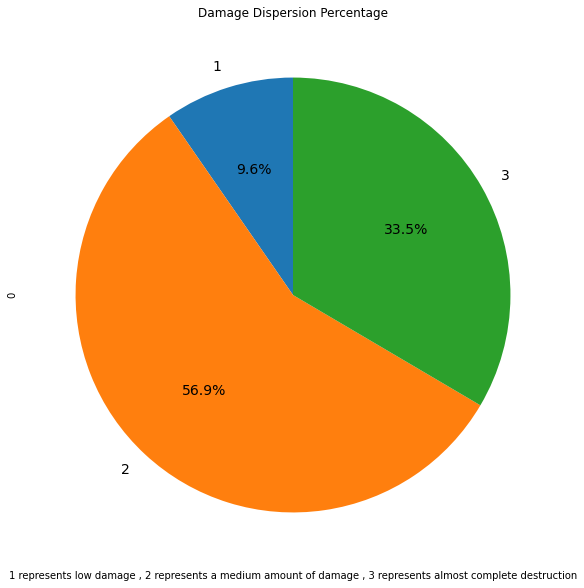

In [72]:
damage_df = total_train[['damage_grade']]

damage = damage_df.groupby(['damage_grade']).size().reset_index()
damage.plot(kind='pie' ,y = 0, autopct='%1.1f%%',  title = "Damage Dispersion Percentage",
startangle=90, shadow=False, labels=  damage['damage_grade'], legend = False, fontsize=14, figsize=(10, 10))
plt.xlabel('1 represents low damage , 2 represents a medium amount of damage , 3 represents almost complete destruction')
plt.show()

 **Heatmap** **of** **Correlation**

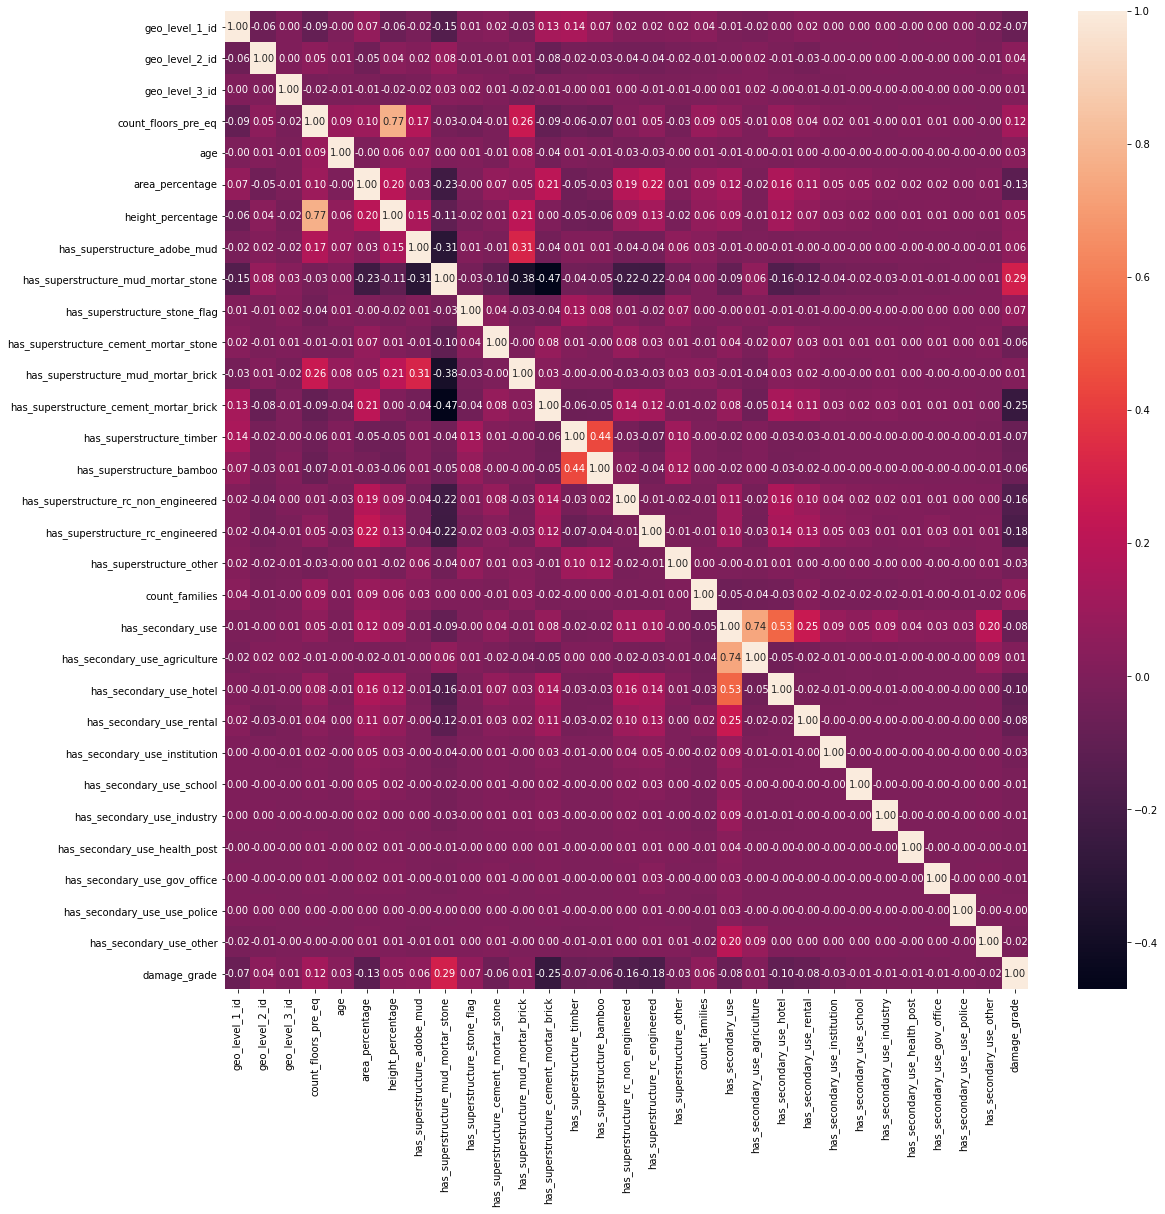

In [73]:
plt.subplots(figsize=(18,18))
sns.heatmap(total_train.corr(), annot=True, fmt=".2f")
plt.show()

In [74]:
corr=total_train.corr().abs()
n_cor = 10
Most_correlated_features=corr['damage_grade'].sort_values(ascending=False)[:n_cor].drop('damage_grade')
Most_correlated_features_name= Most_correlated_features.index.values

In [75]:

start = 0.0
stop = 1.0
number_of_lines= len(Most_correlated_features)
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.jet(x) for x in cm_subsection ]

In [76]:
age_df = total_train['age']



**Bar** **Graphs**

Text(0.5, 0, 'correlation rate')

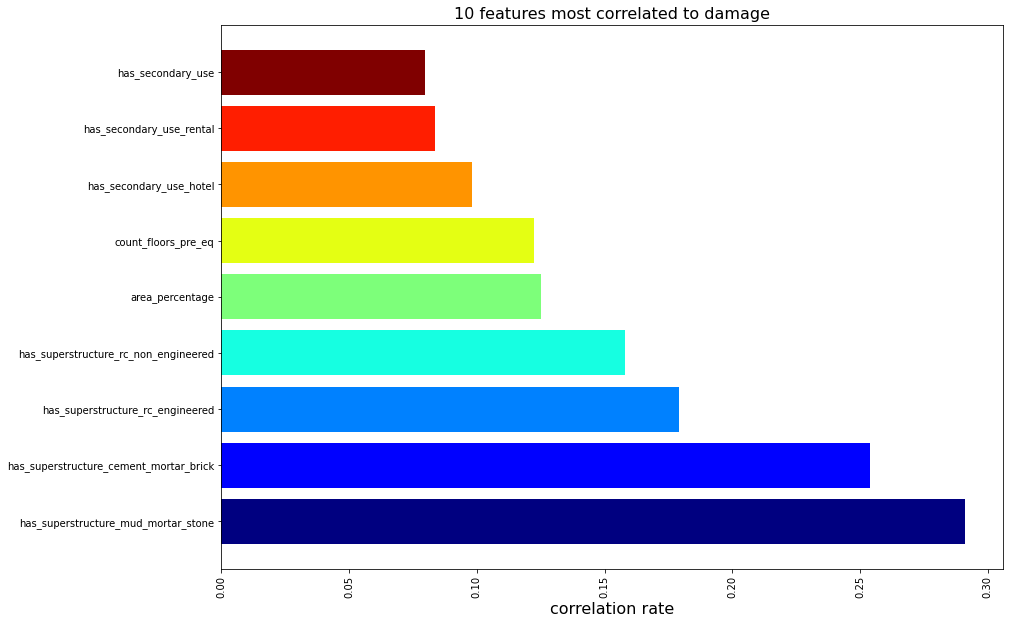

In [77]:
plt.figure(figsize = (14,10))
plt.xticks(rotation='90')
plt.get_cmap('jet')
plt.barh(y= Most_correlated_features.index.values, width= Most_correlated_features , color = colors )
plt.title("10 features most correlated to damage",fontsize = 16)

plt.xlabel('correlation rate',fontsize = 16)

In [78]:
cm_subsection = np.linspace(start, stop, 2) 
colors = [ cm.coolwarm(x) for x in cm_subsection ]

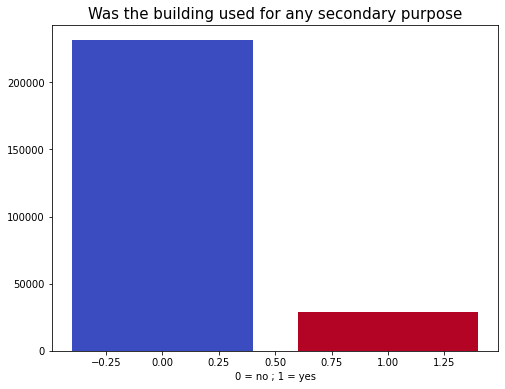

In [79]:

plt.subplots(figsize=(8,6))
has_secondary_use =  total_train['has_secondary_use'].value_counts()
plt.bar(has_secondary_use.index ,  has_secondary_use.values ,color= colors  )
plt.title("Was the building used for any secondary purpose" ,fontsize=15 )

plt.xlabel("0 = no ; 1 = yes")
plt.show()

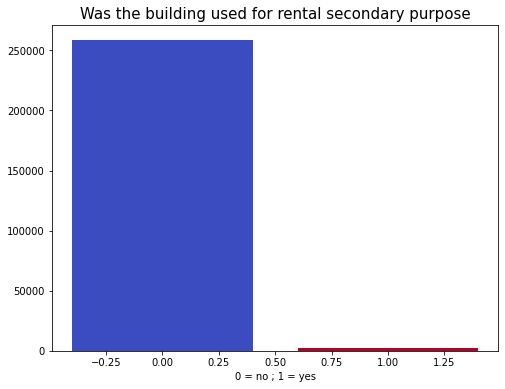

In [80]:
plt.subplots(figsize=(8,6))
has_secondary_use_rental =  total_train['has_secondary_use_rental'].value_counts()
plt.bar(has_secondary_use_rental.index ,  has_secondary_use_rental.values ,color= colors  )
plt.title("Was the building used for rental secondary purpose" ,fontsize=15 )

plt.xlabel("0 = no ; 1 = yes")
plt.show()

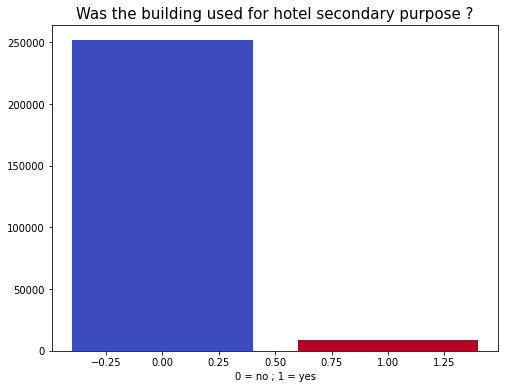

In [81]:
plt.subplots(figsize=(8,6))
has_secondary_use_hotel =  total_train['has_secondary_use_hotel'].value_counts()
plt.bar(has_secondary_use_hotel.index ,  has_secondary_use_hotel.values ,color= colors  )
plt.title("Was the building used for hotel secondary purpose ?" ,fontsize=15 )

plt.xlabel("0 = no ; 1 = yes")
plt.show()

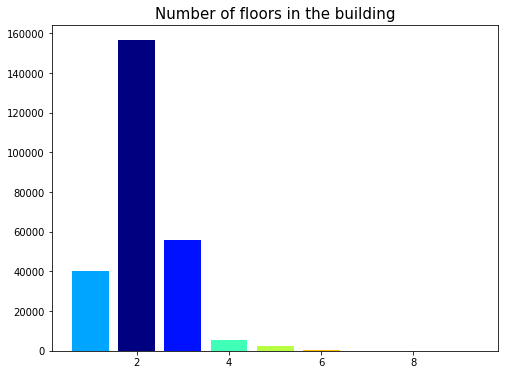

In [82]:
start = 0.0
stop = 1.0
number_of_lines= 8
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors1 = [ cm.jet(x) for x in cm_subsection ]


plt.subplots(figsize=(8,6))
count_floors_pre_eq =  total_train['count_floors_pre_eq'].value_counts()
plt.bar(count_floors_pre_eq.index ,  count_floors_pre_eq.values ,color= colors1  )
plt.title("Number of floors in the building" ,fontsize=15 )
plt.show()

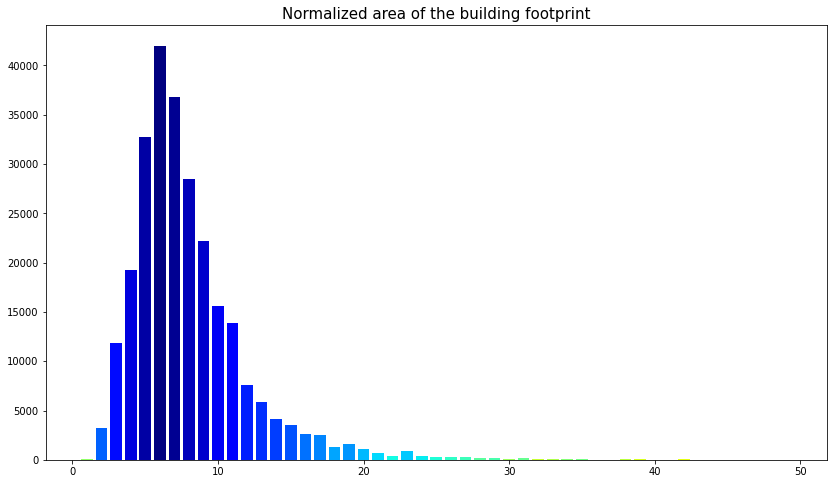

In [83]:
start = 0.0
stop = 1.0
number_of_lines= 60
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors2 = [ cm.jet(x) for x in cm_subsection ]

plt.subplots(figsize=(14,8))
area_percentage = total_train[(total_train['area_percentage']<50)]
area_percentage =  area_percentage['area_percentage'].value_counts() 
plt.bar(area_percentage.index ,  area_percentage.values ,color= colors2  )
plt.title("Normalized area of the building footprint" ,fontsize=15 )

plt.xlabel('')
plt.show()

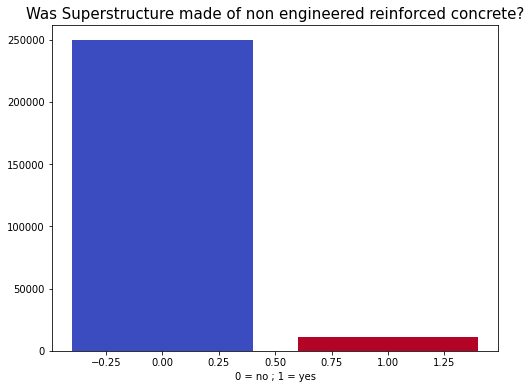

In [84]:
plt.subplots(figsize=(8,6))
has_superstructure_rc_non_engineered =  total_train['has_superstructure_rc_non_engineered'].value_counts()
plt.bar(has_superstructure_rc_non_engineered.index ,  has_superstructure_rc_non_engineered.values ,color= colors  )
plt.title("Was Superstructure made of non engineered reinforced concrete?" ,fontsize=15 )
plt.xlabel("0 = no ; 1 = yes")
plt.show()

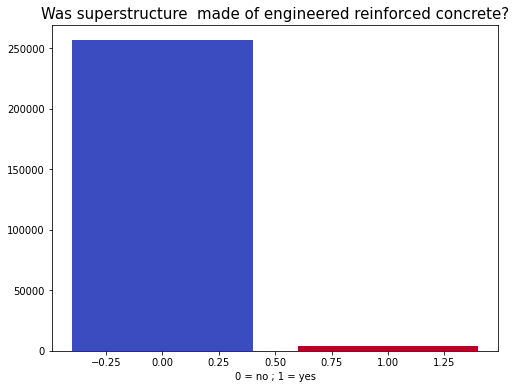

In [85]:
plt.subplots(figsize=(8,6))
has_superstructure_rc_engineered =  total_train['has_superstructure_rc_engineered'].value_counts()
plt.bar(has_superstructure_rc_engineered.index ,  has_superstructure_rc_engineered.values ,color= colors  )
plt.title("Was superstructure  made of engineered reinforced concrete?" ,fontsize=15 )

plt.xlabel("0 = no ; 1 = yes")
plt.show()

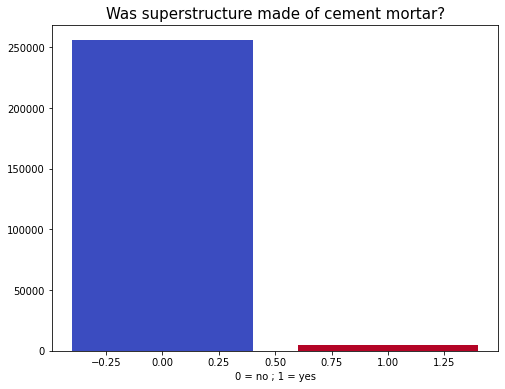

In [86]:
plt.subplots(figsize=(8,6))
has_superstructure_cement_mortar_stone =  total_train['has_superstructure_cement_mortar_stone'].value_counts()
plt.bar(has_superstructure_cement_mortar_stone.index , has_superstructure_cement_mortar_stone.values ,color= colors  )
plt.title("Was superstructure made of cement mortar?" ,fontsize=15 )

plt.xlabel("0 = no ; 1 = yes")
plt.show()

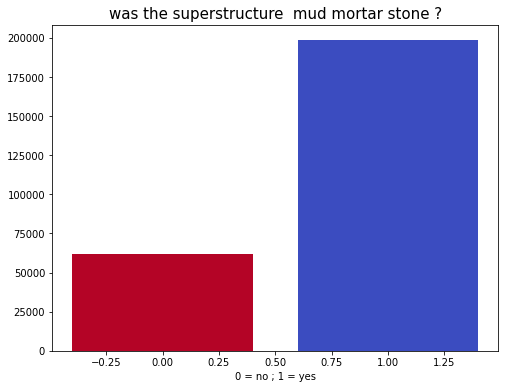

In [137]:
plt.subplots(figsize=(8,6))
has_superstructure_mud_mortar_stone  =  total_train['has_superstructure_mud_mortar_stone'].value_counts()
plt.bar(has_superstructure_mud_mortar_stone.index , has_superstructure_mud_mortar_stone.values ,color= colors  )
plt.title("was the superstructure  mud mortar stone ?" ,fontsize=15 )

plt.xlabel("0 = no ; 1 = yes")
plt.show()

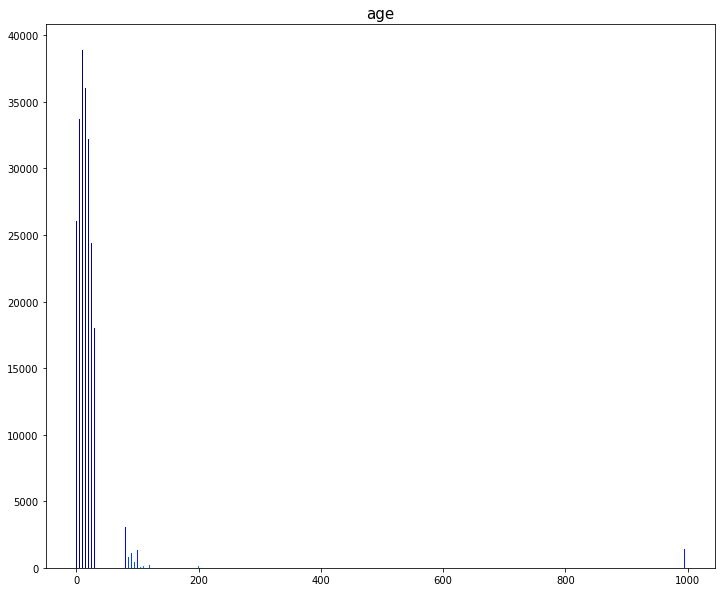

In [88]:
start = 0.0
stop = 1.0
number_of_lines= 100
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors5 = [ cm.jet(x) for x in cm_subsection ]

plt.subplots(figsize=(12,10))
age  =  total_train['age'].value_counts()
plt.bar(age.index , age.values ,color= colors5  )
plt.title("age" ,fontsize=15 )

plt.xlabel("")
plt.show()

**As** **can** **be** **seen** **there** **is** **an** **anomaly** **in** **the** **age** **columns**. **We** **have** **to** **fix** **this**.

In [89]:
total_df = pd.concat([x_train , x_test],axis = 0)

In [90]:
unique, counts = np.unique(total_df['age'].values, return_counts=True)
age_dict = dict(zip(unique, counts))

In [91]:
print(age_dict)

{0: 34725, 5: 45045, 10: 51680, 15: 48074, 20: 42792, 25: 32586, 30: 23977, 35: 14420, 40: 14050, 45: 6255, 50: 9619, 55: 2695, 60: 4773, 65: 1497, 70: 2679, 75: 693, 80: 4087, 85: 1133, 90: 1426, 95: 547, 100: 1880, 105: 119, 110: 142, 115: 30, 120: 236, 125: 62, 130: 13, 135: 5, 140: 11, 145: 3, 150: 179, 155: 4, 160: 8, 165: 2, 170: 7, 175: 5, 180: 11, 185: 1, 190: 5, 195: 2, 200: 140, 995: 1851}


In [92]:
age_df.mean()

26.535028645323695

In [93]:
total_df['age'].replace(995,27, inplace =True)

# Columns Encoding

---








**Age**

In [94]:
total_df['age'].replace([ _ for _ in range(15)],'very new', inplace =True)
total_df['age'].replace([ _ for _ in range(15,31)],'new', inplace =True)
total_df['age'].replace([ _ for _ in range(31,61)],'middle aged', inplace =True)
total_df['age'].replace([ _ for _ in range(61,102) ],'old', inplace =True)
total_df['age'].replace([ _ for _ in range(102,202) ],'very old', inplace =True)

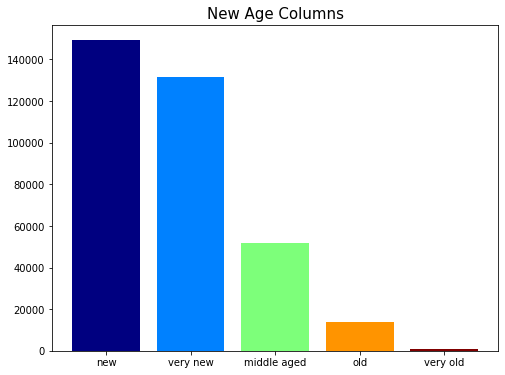

In [95]:
start = 0.0
stop = 1.0
number_of_lines= 5
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors4 = [ cm.jet(x) for x in cm_subsection ]

plt.subplots(figsize=(8,6))
age = total_df['age'].value_counts()
plt.bar(x = age.index , height = age.values, color = colors4)
plt.title("New Age Columns" ,fontsize=15 )
plt.show()

**Count** **Floors**

In [96]:
total_df.head(10)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,new,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,very new,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,very new,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,very new,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,new,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
5,8,558,6089,2,very new,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
6,9,475,12066,2,new,3,4,n,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
7,20,323,12236,2,very new,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
8,0,757,7219,2,new,8,6,t,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
9,26,886,994,1,very new,13,4,t,i,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [97]:
unique, counts = np.unique(total_df['count_floors_pre_eq'].values, return_counts=True)
count_dict = dict(zip(unique, counts))
print(count_dict)

{1: 53705, 2: 209029, 3: 74171, 4: 7186, 5: 3039, 6: 283, 7: 52, 8: 3, 9: 1}


In [98]:
total_df['count_floors_pre_eq'].replace([ _ for _ in range(0,2)],'1 floor', inplace =True)
total_df['count_floors_pre_eq'].replace([ _ for _ in range(2,3)],'2 floors', inplace =True)
total_df['count_floors_pre_eq'].replace([ _ for _ in range(3,4)],'3 floors', inplace =True)
total_df['count_floors_pre_eq'].replace([ _ for _ in range(4,5)],'4 floors', inplace =True)
total_df['count_floors_pre_eq'].replace([ _ for _ in range(5,7)],'5-6 floors', inplace =True)
total_df['count_floors_pre_eq'].replace([ _ for _ in range(7,10) ],'7+ floors', inplace =True)

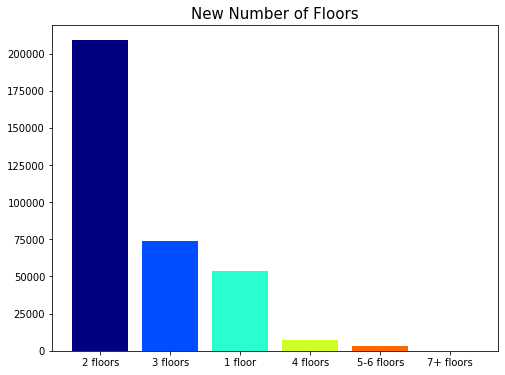

In [99]:
start = 0.0
stop = 1.0
number_of_lines= 6
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors4 = [ cm.jet(x) for x in cm_subsection ]

plt.subplots(figsize=(8,6))
floor = total_df['count_floors_pre_eq'].value_counts()
plt.bar(x = floor.index , height = floor.values, color = colors4)
plt.title("New Number of Floors" ,fontsize=15 )
plt.show()

**Area** **Percentage**

In [100]:
unique, counts = np.unique(total_df['area_percentage'].values, return_counts=True)
area_dict = dict(zip(unique, counts))

In [101]:
print(area_dict)

{1: 125, 2: 4275, 3: 15687, 4: 25675, 5: 43556, 6: 55959, 7: 49140, 8: 37988, 9: 29572, 10: 21030, 11: 18390, 12: 10148, 13: 7725, 14: 5532, 15: 4668, 16: 3465, 17: 3237, 18: 1738, 19: 2118, 20: 1411, 21: 892, 22: 526, 23: 1157, 24: 548, 25: 345, 26: 334, 27: 312, 28: 216, 29: 259, 30: 114, 31: 207, 32: 75, 33: 104, 34: 132, 35: 151, 36: 41, 37: 18, 38: 99, 39: 42, 40: 38, 41: 14, 42: 46, 43: 17, 44: 11, 45: 19, 46: 26, 47: 10, 48: 25, 49: 17, 50: 12, 51: 4, 52: 31, 53: 7, 54: 11, 55: 2, 56: 7, 57: 16, 58: 14, 59: 5, 60: 3, 61: 5, 62: 6, 63: 8, 64: 5, 65: 8, 66: 10, 67: 8, 69: 5, 70: 11, 72: 8, 73: 3, 75: 1, 76: 2, 77: 10, 78: 2, 80: 2, 81: 1, 82: 1, 83: 4, 84: 3, 85: 5, 86: 7, 90: 1, 92: 3, 96: 3, 100: 1}


In [102]:
total_df['area_percentage'].replace([ _ for _ in range(0,7)],'very low percentage', inplace =True)
total_df['area_percentage'].replace([ _ for _ in range(7,10)],'low percentage', inplace =True)
total_df['area_percentage'].replace([ _ for _ in range(10,22)],'middle percentage', inplace =True)
total_df['area_percentage'].replace([ _ for _ in range(22,35)],'high percentage', inplace =True)
total_df['area_percentage'].replace([ _ for _ in range(35,101)],'very high percentage', inplace =True)


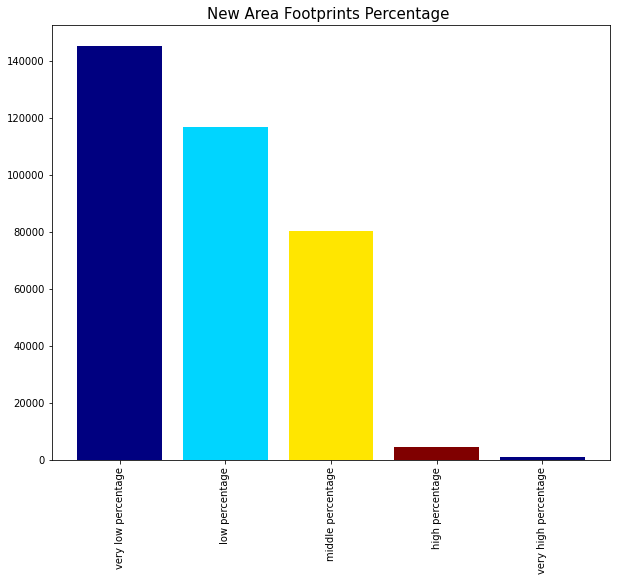

In [103]:
start = 0.0
stop = 1.0
number_of_lines= 4
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors4 = [ cm.jet(x) for x in cm_subsection ]

plt.subplots(figsize=(10,8))
area_percentage = total_df['area_percentage'].value_counts()
plt.bar(x = area_percentage.index , height = area_percentage.values, color = colors4)
plt.xticks(rotation='90')
plt.title("New Area Footprints Percentage " ,fontsize=15 )
plt.show()

**Height** **Percentage**

In [104]:
unique, counts = np.unique(total_df['height_percentage'].values, return_counts=True)
height_dict = dict(zip(unique, counts))
print(height_dict)

{2: 12348, 3: 34535, 4: 50427, 5: 104869, 6: 61837, 7: 47360, 8: 18460, 9: 7146, 10: 5934, 11: 1242, 12: 1246, 13: 1036, 14: 85, 15: 399, 16: 246, 17: 11, 18: 95, 19: 8, 20: 41, 21: 21, 22: 3, 23: 12, 24: 6, 25: 4, 26: 3, 28: 2, 29: 1, 31: 2, 32: 90}


In [105]:
total_df['height_percentage'].replace([ _ for _ in range(0,5)],'very low height', inplace =True)
total_df['height_percentage'].replace([ _ for _ in range(5,6)],'low height', inplace =True)
total_df['height_percentage'].replace([ _ for _ in range(6,8)],'middle height', inplace =True)
total_df['height_percentage'].replace([ _ for _ in range(8,101)],'high height', inplace =True)

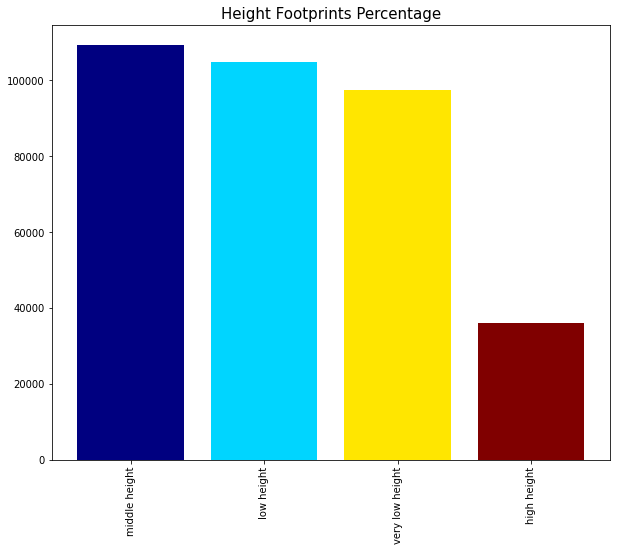

In [106]:
start = 0.0
stop = 1.0
number_of_lines= 4
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors4 = [ cm.jet(x) for x in cm_subsection ]

plt.subplots(figsize=(10,8))
height_percentage = total_df['height_percentage'].value_counts()
plt.bar(x = height_percentage.index , height = height_percentage.values, color = colors4)
plt.xticks(rotation='90')
plt.title("Height Footprints Percentage" ,fontsize=15 )
plt.show()

In [107]:
unique, counts = np.unique(total_df['geo_level_1_id'].values, return_counts=True)
geo_level_1_dict = dict(zip(unique, counts))
print(geo_level_1_dict)

{0: 5358, 1: 3588, 2: 1221, 3: 9995, 4: 19462, 5: 3579, 6: 32485, 7: 25565, 8: 25465, 9: 5213, 10: 29399, 11: 10895, 12: 4204, 13: 12846, 14: 2319, 15: 3134, 16: 5724, 17: 29265, 18: 4200, 19: 496, 20: 22761, 21: 19944, 22: 8358, 23: 1498, 24: 1737, 25: 7489, 26: 30002, 27: 16786, 28: 349, 29: 537, 30: 3595}


In [108]:
total_df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2 floors,new,very low percentage,low height,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2 floors,very new,low percentage,middle height,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2 floors,very new,very low percentage,low height,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2 floors,very new,very low percentage,low height,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3 floors,new,low percentage,high height,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


# Missing Datas

In [109]:
total_train.isnull().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

**Dataset does not contain null values**




**Defining** **the** **columns** **types**

In [110]:
def Column_labeler(Df,Label):

    bin_col = []
    cat_col = []
    for x in Label:
            if len(np.unique(Df[x].values)) == 2 and [y for y in Df[x] if type(y) == str ] :
                 bin_col.append(x)
            elif [y for y in Df[x] if type(y) == str ]:
                cat_col.append(x)
                
    return  bin_col , cat_col

In [111]:
columns_list = list(total_df.columns.values) 

bin_col , cat_col = Column_labeler(total_df,columns_list)

**Label** **encoding**

In [112]:
Lb = LabelEncoder()
for x in bin_col:
    total_df[x] = Lb.fit_transform(total_df[x])

**One** **hot** **encoding**

In [113]:
total_df =  pd.get_dummies(total_df , columns =[x for x in cat_col])

In [114]:
total_df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,count_floors_pre_eq_1 floor,count_floors_pre_eq_2 floors,count_floors_pre_eq_3 floors,count_floors_pre_eq_4 floors,count_floors_pre_eq_5-6 floors,count_floors_pre_eq_7+ floors,age_middle aged,age_new,age_old,age_very new,age_very old,area_percentage_high percentage,area_percentage_low percentage,area_percentage_middle percentage,...,height_percentage_middle height,height_percentage_very low height,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


Our dataset contains various data types. Such as object ,  uint8 ,int64. We have to convert all of these to float data types. 
Otherwise this model will not work.

In [115]:
New_columns_list = list(total_df.columns.values) 
for columns in New_columns_list :
    total_df[columns] = total_df[columns].astype(float)

In [116]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347469 entries, 0 to 86867
Data columns (total 84 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   geo_level_1_id                          347469 non-null  float64
 1   geo_level_2_id                          347469 non-null  float64
 2   geo_level_3_id                          347469 non-null  float64
 3   has_superstructure_adobe_mud            347469 non-null  float64
 4   has_superstructure_mud_mortar_stone     347469 non-null  float64
 5   has_superstructure_stone_flag           347469 non-null  float64
 6   has_superstructure_cement_mortar_stone  347469 non-null  float64
 7   has_superstructure_mud_mortar_brick     347469 non-null  float64
 8   has_superstructure_cement_mortar_brick  347469 non-null  float64
 9   has_superstructure_timber               347469 non-null  float64
 10  has_superstructure_bamboo               34746

# Model and Predictions

In [117]:

from sklearn.preprocessing import StandardScaler

 **This function will give us  defines which columns need to standardization process.**

In [118]:
def Standartize_preprocessing(Df,Label):
    bin_col = []
    other_col = []
    for rtx in Label:
          if  1.0 in np.unique(Df[rtx].values)  and  0.0 in np.unique(Df[rtx].values) and len(np.unique(Df[rtx].values)) == 2 :
                bin_col.append(rtx)
          else:
              other_col.append(rtx)
              
    return  bin_col ,  other_col

In [119]:
Ns , S  = Standartize_preprocessing(total_df  , New_columns_list)

In [120]:
for std in S:
   total_df[[std]] = StandardScaler().fit_transform(total_df[[std]])
  

In [121]:
print( x_train.shape , '  ',  x_test.shape, '   ' , total_df.shape)

(260601, 38)    (86868, 38)     (347469, 84)


# Separating  Data

---



In [122]:
Ready_xtrain = total_df.iloc[:260601]

Ready_xtest = total_df.iloc[260601: ,:]

In [123]:

y_train = pd.get_dummies(y_train, columns = y_train.columns.tolist() )

In [124]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [125]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


**Dataset is very big and we are going to use too many epochs therefore we use dropout layers. Because dropout layers prevent overfitting.**

In [126]:
with tf.device('/GPU:0'):
    tf.keras.backend.set_floatx('float64')
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten()  ,                              
        tf.keras.layers.Dense(2000, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(2000, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1000, activation="relu"),
        tf.keras.layers.Dense(500, activation="relu"),
 
        tf.keras.layers.Dense(3 ,activation="softmax")
        ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy' , 'mse'] )
   
    history = model.fit( Ready_xtrain , y_train, epochs=10 )
     
    

Epoch 1/10
8144/8144 [==============================] - 126s 15ms/step - loss: 0.7826 - accuracy: 0.6076 - mse: 0.1645
Epoch 2/10
8144/8144 [==============================] - 128s 16ms/step - loss: 0.7197 - accuracy: 0.6569 - mse: 0.1505
Epoch 3/10
8144/8144 [==============================] - 126s 16ms/step - loss: 0.7034 - accuracy: 0.6681 - mse: 0.1468
Epoch 4/10
8144/8144 [==============================] - 126s 16ms/step - loss: 0.6918 - accuracy: 0.6746 - mse: 0.1443
Epoch 5/10
8144/8144 [==============================] - 126s 15ms/step - loss: 0.6851 - accuracy: 0.6793 - mse: 0.1430
Epoch 6/10
8144/8144 [==============================] - 126s 15ms/step - loss: 0.6789 - accuracy: 0.6825 - mse: 0.1415
Epoch 7/10
8144/8144 [==============================] - 126s 16ms/step - loss: 0.6701 - accuracy: 0.6879 - mse: 0.1396
Epoch 8/10
8144/8144 [==============================] - 126s 15ms/step - loss: 0.6664 - accuracy: 0.6907 - mse: 0.1388
Epoch 9/10
8144/8144 [==========================

In [127]:
predict = model.predict(Ready_xtest)

In [128]:
acc      = history.history[ 'accuracy' ]
loss     = history.history[ 'loss' ]
epochs   = range(len(acc)) 
mse =  history.history[ 'mse' ]

In [129]:
def labeler(data):
  predicts_list = []
  for x in data:
    x = x.tolist()
    predict = x.index(max(x))+1
    predicts_list.append(predict)
  return predicts_list  

In [130]:
predicts = labeler(predict)

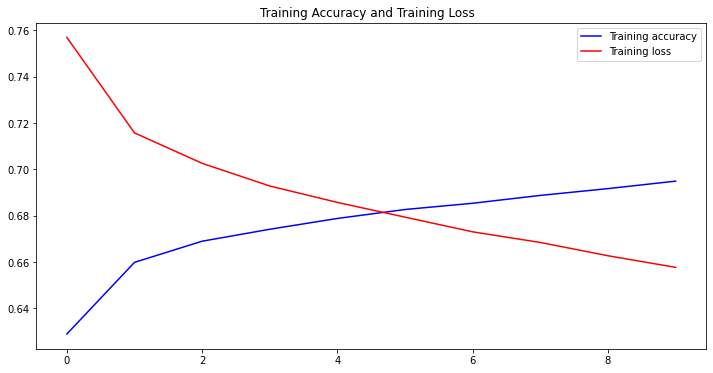

<Figure size 432x288 with 0 Axes>

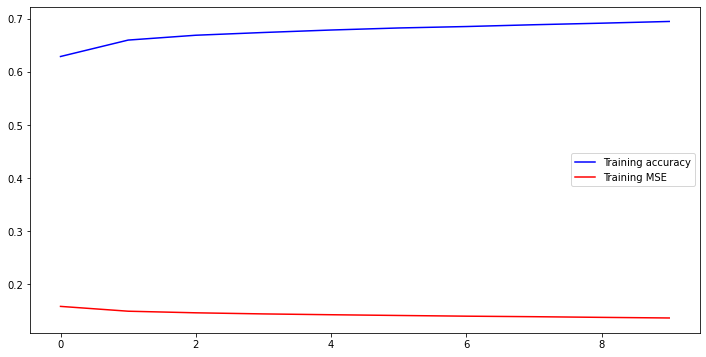

<Figure size 432x288 with 0 Axes>

In [131]:
plt.subplots(figsize=(12,6))
plt.plot  (epochs, acc ,'b', label='Training accuracy' )
plt.plot  (epochs, loss  , 'r' , label='Training loss')
plt.title ('Training Accuracy and Training Loss  '   )
plt.legend(loc=0)
plt.figure()
plt.subplots(figsize=(12,6))
plt.plot  (epochs, acc ,'b', label='Training accuracy' )
plt.plot  (epochs, mse  , 'r' , label='Training MSE')
plt.legend(loc=0)
plt.figure()

plt.show()

In [132]:
submission = pd.read_csv("drive/My Drive/earthquake/submission_format.csv")

In [133]:
predictions = pd.DataFrame(predicts , columns = ['damage_grade'])

In [134]:
predictions.head()

,damage_grade
0,3
1,2
2,2
3,2
4,3


In [135]:
Result =  pd.concat([submission[['building_id']],predictions],axis=1)
Result.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,2
4,421793,3


In [136]:
Result.to_csv('drive/My Drive/kaggle/Earthquakepredict1.csv',index=False)